In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [227]:
#loading the dataset
df = pd.read_csv('ecommerce_data.csv')

In [228]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,channel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Email
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Email
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Email
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Email
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Email


# Pre Processing

In [229]:
#First, we format the date column
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'])

In [230]:
df.shape
#we have a total of 541909 rows and 9 columns

(541909, 9)

In [231]:
#check for missing values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
channel             0
dtype: int64

In [232]:
#Dropping all the null values since we will be left with enough rows 
df.dropna(inplace=True)

In [233]:
df.isna().sum() 
#There are no null values now

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
channel        0
dtype: int64

In [234]:
#Let's check for any duplicate rows
duplicate = df.duplicated().sum()
print(duplicate)

5225


In [235]:
#we will drop these as well
df.drop_duplicates(inplace= True)

In [236]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,channel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Email
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Email
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Email
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Email
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Email


In [237]:
df.describe()
#We can see that we have negative values for quantity is isn't right for our analysis so we will drop them

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [238]:
#Since the quantity and unit price should not be negative, we will only select the non negative values
df1 = df[(df['Quantity']>0) & (df['UnitPrice']>0)]

In [239]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [240]:
#Formatting the date column for our dataset and adding hour, month and weekday
df1['Hour']=df1['InvoiceDate'].dt.hour
df1['Month']=df1['InvoiceDate'].dt.month
df1['Weekdays']= df1['InvoiceDate'].dt.weekday

In [241]:
df1['TotalAmount'] = df1['Quantity'] * df1['UnitPrice']

In [242]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,channel,Hour,Month,Weekdays,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Email,8,12,2,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Email,8,12,2,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Email,8,12,2,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Email,8,12,2,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Email,8,12,2,20.34


# Exploratory analysis

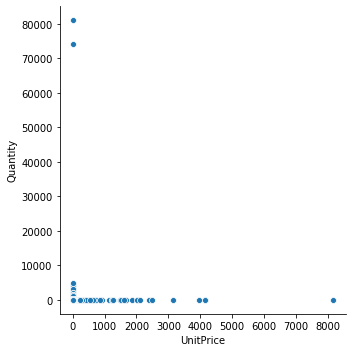

In [243]:
sns.relplot(x='UnitPrice',y='Quantity',data=df1)
#The unit price is mostly under 2000 and quantity is under 5000 with a few outliers

In [244]:
counts = df1['Country'].value_counts().to_dict()

In [245]:
keys = counts.keys()
values = counts.values()

In [246]:
import matplotlib.pyplot as plt

print(plt.rcParams.get('figure.figsize'))

[10.0, 8.0]


In [247]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36],
 <a list of 37 Text xticklabel objects>)

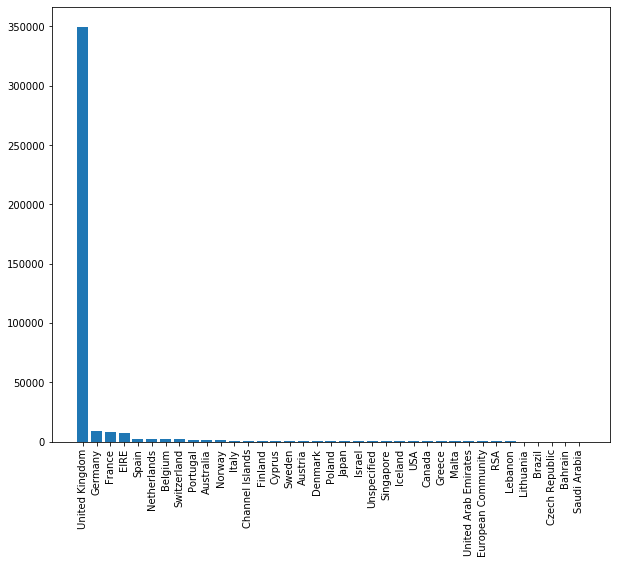

In [248]:
plt.bar(keys, values,width=0.8)
plt.xticks(rotation=90)
#With this graph, we can see that our dataset contains most of these purchases made in UK, followed by Germany and France.

# RFM

In [249]:
#We will create a new dataset with Recency, Monetization and frequency 
list_of_customerid = df1.CustomerID.unique()
cus = []
mon = []
rec = []
freq = []
for i in list_of_customerid:
    cus.append(i)
    rec.append(min(df1.loc[df1.CustomerID == i].InvoiceDate))
    mon.append(sum(df1.loc[df1.CustomerID == i].TotalAmount))
    freq.append(len(df1.loc[df1.CustomerID == i].InvoiceDate.unique()))
    
new_df = pd.DataFrame({'Recency': rec, 'Monetization': mon, 'Frequency': freq}, index=cus)

In [250]:
a = new_df.reset_index()

In [251]:
new_df
#Here, we can see that the customer with ID 17850 had transaction 33 times and his total amount of transaction was 5391

,Recency,Monetization,Frequency
17850.0,2010-12-01 08:26:00,5391.21,33
13047.0,2010-12-01 08:34:00,3237.54,9
12583.0,2010-12-01 08:45:00,7281.38,15
13748.0,2010-12-01 09:00:00,948.25,4
15100.0,2010-12-01 09:09:00,876.00,3
...,...,...,...
13436.0,2011-12-08 10:33:00,196.89,1
15520.0,2011-12-08 10:58:00,343.50,1
13298.0,2011-12-08 13:11:00,360.00,1
14569.0,2011-12-08 14:58:00,227.39,1


In [252]:
e = df1['InvoiceDate'].min()
print('minimun :'+ str(e))

minimun :2010-12-01 08:26:00


In [253]:
new_df['Recency'] = new_df['Recency'].apply(lambda x : (x - e).days)

In [292]:
#With the quantiles methiod, we will have the lower, middle and upper quantiles
#we will focus on the upper quantile for our target customers
quantiles = new_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
rfm = new_df

In [255]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [293]:
rfm['r_quartile'] = rfm['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm['f_quartile'] = rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm['m_quartile'] = rfm['Monetization'].apply(FMScore, args=('Monetization',quantiles,))
rfm.head()

,Recency,Monetization,Frequency,r_quartile,f_quartile,m_quartile,RFMScore
17850.0,0,5391.21,33,4,4,4,444
13047.0,0,3237.54,9,4,4,4,444
12583.0,0,7281.38,15,4,4,4,444
13748.0,0,948.25,4,4,3,3,433
15100.0,0,876.00,3,4,3,3,433


In [294]:
rfm['RFMScore'] = rfm.r_quartile.map(str)+rfm.f_quartile.map(str)+rfm.m_quartile.map(str)
rfm.head()

,Recency,Monetization,Frequency,r_quartile,f_quartile,m_quartile,RFMScore
17850.0,0,5391.21,33,4,4,4,444
13047.0,0,3237.54,9,4,4,4,444
12583.0,0,7281.38,15,4,4,4,444
13748.0,0,948.25,4,4,3,3,433
15100.0,0,876.00,3,4,3,3,433


In [295]:
output = rfm.head(500)

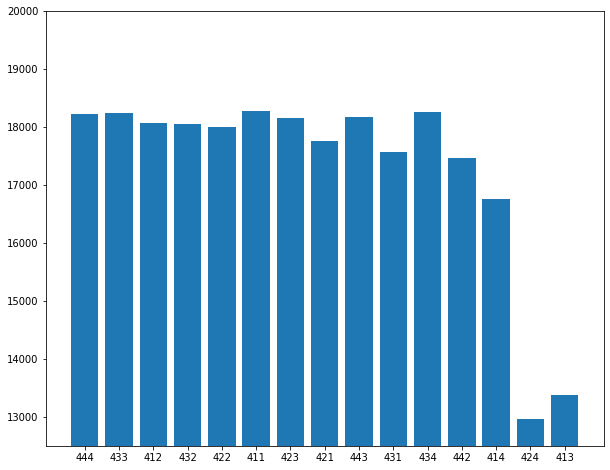

In [296]:
fig, ax = plt.subplots()
ax.bar(output['RFMScore'], output.index)
ax.set_ylim([12500,20000])
plt.show()

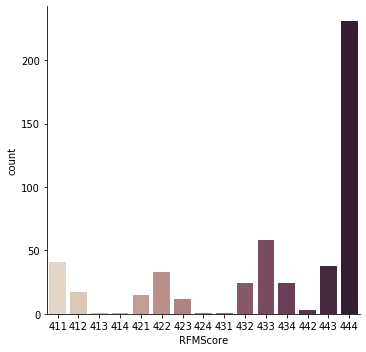

In [297]:
sns.catplot(x='RFMScore',data=output,kind='count',palette="ch:.25")